<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [3]:
df.date = pd.to_datetime(df.date) # 날짜 형식 변환
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
train = df[df.date < '2015-01-01']
test = df[df.date >= '2015-01-01']

len(train)

14633

In [5]:
def setData(df):
  train = df[df.date < '2015-01-01']
  test = df[df.date >= '2015-01-01']
  
  return train, test

In [6]:
# 참고
# test 데이터 : date 컬럼 값이 2015-01-01 보다 큰 row 추출
# test = df[df['date']>'2015-01-01']

# train 데이터 : test 데이터를 제외(drop)한 나머지 데이터
# train = df.drop(test.index)

### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- 정규화(normalize) 등 추가적인 데이터처리 없이 진행합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

In [7]:
# label 정의
target = 'price'
y_train = train[target]
y_test = test[target]

In [8]:
# price 평균값으로 예측(기준모델)
predict = y_train.mean()
predict

539181.4284152258

In [9]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 233570.83


In [10]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 233990.69


In [11]:
# 다중모델 학습을 위한 특성
features = ['bathrooms', 
            'sqft_living']
X_train = train[features]
X_test = test[features]

In [12]:
# 모델 fit
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 170777.34


In [13]:
# 테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 179252.53


In [14]:
def modeling(features, model, train, test):
  # 특성
  features = features
  X_train = train[features]
  X_test = test[features]
  y_train = train[target]
  y_test = test[target]

  # 모델 fit
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  mae = mean_absolute_error(y_train, y_pred)
  print(f'훈련 에러: {mae:.2f}')

  # 테스트 데이터에 적용
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f'테스트 에러: {mae:.2f}')

  ## 절편(intercept)과 계수들(coefficients)
  print(f'절편 : {model.intercept_}')
  print(f'회귀 계수 : {model.coef_}')

  return model

### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [15]:
## 절편(intercept)과 계수들(coefficients)
model.intercept_, model.coef_

(-50243.56279640319, array([-5158.92591411,   286.13753555]))

In [16]:
## 회귀식
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -50244 + -5159x₁ + 286x₂


### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [17]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

def evaluate(features, model, train, test):
  y_train = train[target]
  y_test = test[target]
  X_train = train[features]
  X_test = test[features]
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  mse = mean_squared_error(y_train, y_pred_train)
  rmse = mse ** 0.5
  mae = mean_absolute_error(y_train, y_pred_train)
  r2 = r2_score(y_train, y_pred_train)

  mse_t = mean_squared_error(y_test, y_pred_test)
  rmse_t = mse_t ** 0.5
  mae_t = mean_absolute_error(y_test, y_pred_test)
  r2_t = r2_score(y_test, y_pred_test)

  display(pd.DataFrame([['MSE', mse, mse_t],['RMSE', rmse, rmse_t],['MAE', mae, mae_t],['R2', r2, r2_t]], columns=['Metric', 'Score(Training)', 'Score(Test)']))

In [18]:
evaluate(features, model, train, test)

,Metric,Score(Training),Score(Test)
0,MSE,6.709905e+10,7.108399e+10
1,RMSE,2.590348e+05,2.666158e+05
2,MAE,1.707773e+05,1.792525e+05
3,R2,5.076086e-01,4.599930e-01


## 🔥도전과제

### 공지로 안내드리는 Github - Discussion 페이지에 올려 보세요:)

### 5)  EDA를 진행하시고, 두개 이상의 특성을 선택하여 특성공학(feature engineering)을 진행한 후 아래의 질문들에 대한 본인만의 리포트를 작성해보시고 서로 논해 보세요. 
- 어떤 이유에서 해당 특성공학을 진행하셨나요? 특성공학을 통해 기대하는 효과는 무엇이었나요? 만약 얻고자 하는 효과를 얻지 못했다면 이유는 무엇이며 어떤 액션을 추가할 수 있을까요? 
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어는 어떠한가요? 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있었나요? 
- 만들어진 회귀계수를 사용해 모델을 설명해 본다면? 
- 만들어진 모델은 과소적합인가요? 과대적합인가요? 일반화가 잘 된 모델을 만들기 위해 추가로 할 수 있는 액션은 어떤 것이 있을까요? 

※kaggle notebook에서도 힌트를 얻어 보세요. 

In [19]:
df = df[df.bedrooms != 0] # 방 없는 집(?) 제외
# df[df.bedrooms == 0]

In [20]:
# (거주 면적 / 방 개수)로 집값을 알 수 있을까?
df['sqrt_per_room'] = df.sqft_living / df.bedrooms
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqrt_per_room
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,393.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,856.666667
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,385.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,490.000000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,560.000000


In [21]:
# (지상층 면적 / 층 수)로 집값을 알 수 있을까?
df['sqrt_above_per_floor'] = df.sqft_above / df.floors
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqrt_per_room,sqrt_above_per_floor
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,393.333333,1180.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,856.666667,1085.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,385.000000,770.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,490.000000,1050.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,560.000000,1680.0


In [22]:
train, test = setData(df)

In [23]:
model_room = LinearRegression()
model_room = modeling(['sqrt_per_room'], model_room, train, test)

# 각 집의 방 1개 당 면적(평균)이 1 증가할 때 집값이 약 994 상승할 것으로 예상된다.

훈련 에러: 186981.32
테스트 에러: 192174.86
절편 : -79488.4001448683
회귀 계수 : [993.80018006]


In [24]:
evaluate(['sqrt_per_room'], model_room, train, test)

# R^2 스코어가 0.32로, 모델이 일을 썩 잘 하는 것으로 보이지 않는다.
# 각 집의 방 1개 당 면적(평균)이 집값을 예측하는데 크게 도움이 되지는 않는다.

,Metric,Score(Training),Score(Test)
0,MSE,8.922792e+10,8.994389e+10
1,RMSE,2.987104e+05,2.999065e+05
2,MAE,1.869813e+05,1.921749e+05
3,R2,3.451323e-01,3.169083e-01


In [25]:
model_floor = LinearRegression()
model_floor = modeling(['sqrt_above_per_floor'], model_floor, train, test)

# 각 집의 지상층 수 1개 당 면적(평균)이 1 증가할 때 집값이 약 368 상승할 것으로 예상된다.

훈련 에러: 215612.97
테스트 에러: 220055.78
절편 : 83090.60475149099
회귀 계수 : [368.2056262]


In [26]:
evaluate(['sqrt_above_per_floor'], model_floor, train, test)

# R^2 스코어가 0.19로, 모델이 일을 썩 잘 하는 것으로 보이지 않는다.
# 각 집의 지상층 수 1개 당 면적(평균)이 집값을 예측하는데 크게 도움이 되지는 않는다.

,Metric,Score(Training),Score(Test)
0,MSE,1.091497e+11,1.066880e+11
1,RMSE,3.303780e+05,3.266312e+05
2,MAE,2.156130e+05,2.200558e+05
3,R2,1.989214e-01,1.897430e-01


In [27]:
# 위 두 가지를 같이 고려하면 더 잘 예측할 수 있을까?
model_total = LinearRegression()
model_total = modeling(['sqrt_per_room', 'sqrt_above_per_floor'], model_total, train, test)

훈련 에러: 186717.85
테스트 에러: 192845.31
절편 : -180779.55683841312
회귀 계수 : [821.97411013 168.11689353]


In [28]:
evaluate(['sqrt_per_room', 'sqrt_above_per_floor'], model_total, train, test)

# R^2 스코어가 0.35로, 여전히 모델이 일을 썩 잘 하는 것으로 보이지 않는다.
# 각 집의 방 1개 당 면적(평균)과 각 집의 지상층 수 1개 당 면적(평균)을 같이 고려해도 집값을 예측하는데 크게 도움이 되지는 않는다.

,Metric,Score(Training),Score(Test)
0,MSE,8.498340e+10,8.578739e+10
1,RMSE,2.915191e+05,2.928948e+05
2,MAE,1.867178e+05,1.928453e+05
3,R2,3.762840e-01,3.484755e-01


In [29]:
### 과적합 / 과소적합 여부 판단하는 내용 추가 필요

### 참고

In [30]:
# 사용하지 않을 컬럼 삭제 : id, date
df_selected = df.drop(["id", "date"], axis=1)

# describe로 컬럼별 기초통계값 살펴보기
df_selected.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqrt_per_room,sqrt_above_per_floor
count,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,5.401667e+05,3.372870,2.115532,2080.123657,1.510153e+04,1.494028,0.007546,0.234259,3.409769,7.657454,1788.439167,291.684491,1970.997407,84.453056,98077.946574,47.560082,-122.213935,1986.522176,12760.433796,618.152810,1237.201664
std,3.671263e+05,0.926657,0.769335,918.196482,4.141029e+04,0.539677,0.086543,0.766342,0.650590,1.173983,827.810514,442.650407,29.373978,401.794764,53.511449,0.138558,0.140776,685.242489,27273.435461,215.884916,447.716167
min,7.500000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,49.090909,253.333333
25%,3.220000e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,470.000000,940.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000,576.666667,1185.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,722.500000,1465.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,3420.000000,5400.000000


In [31]:
# 결측치 확인 : 없음
df_selected.isnull().sum()

price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sqrt_per_room           0
sqrt_above_per_floor    0
dtype: int64

In [32]:
# 중복값 확인 -> 5개 확인
print("중복값 제거 전 :", df_selected.shape[0])
print("중복값 :", df_selected.duplicated().sum())

# 중복값 제거 - 나중에 나오는 중복값을 제거
df_selected.drop_duplicates(keep="first", inplace=True)

# 데이터 volume 확인
print("중복값 제거 후 : row {0}개, column {1}개".format(df_selected.shape[0],df_selected.shape[1]))

중복값 제거 전 : 21600
중복값 : 5
중복값 제거 후 : row 21595개, column 21개


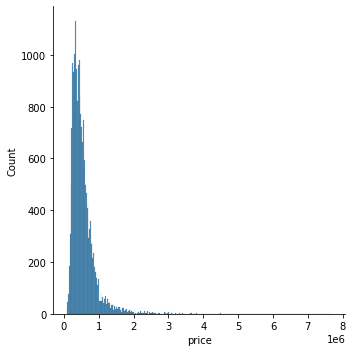

In [33]:
# target 설정 및 범주 확인
import seaborn as sns
target="price"
sns.displot(df_selected[target])

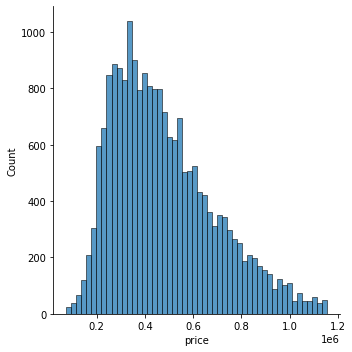

In [34]:
# outlier : 상위 5%로 설정
price_top_5percent = df_selected[target].quantile(q=0.95)

# outlier 제거
df_selected = df_selected[df_selected[target] < price_top_5percent]

# 시각화로 살펴보기
sns.displot(df_selected[target])

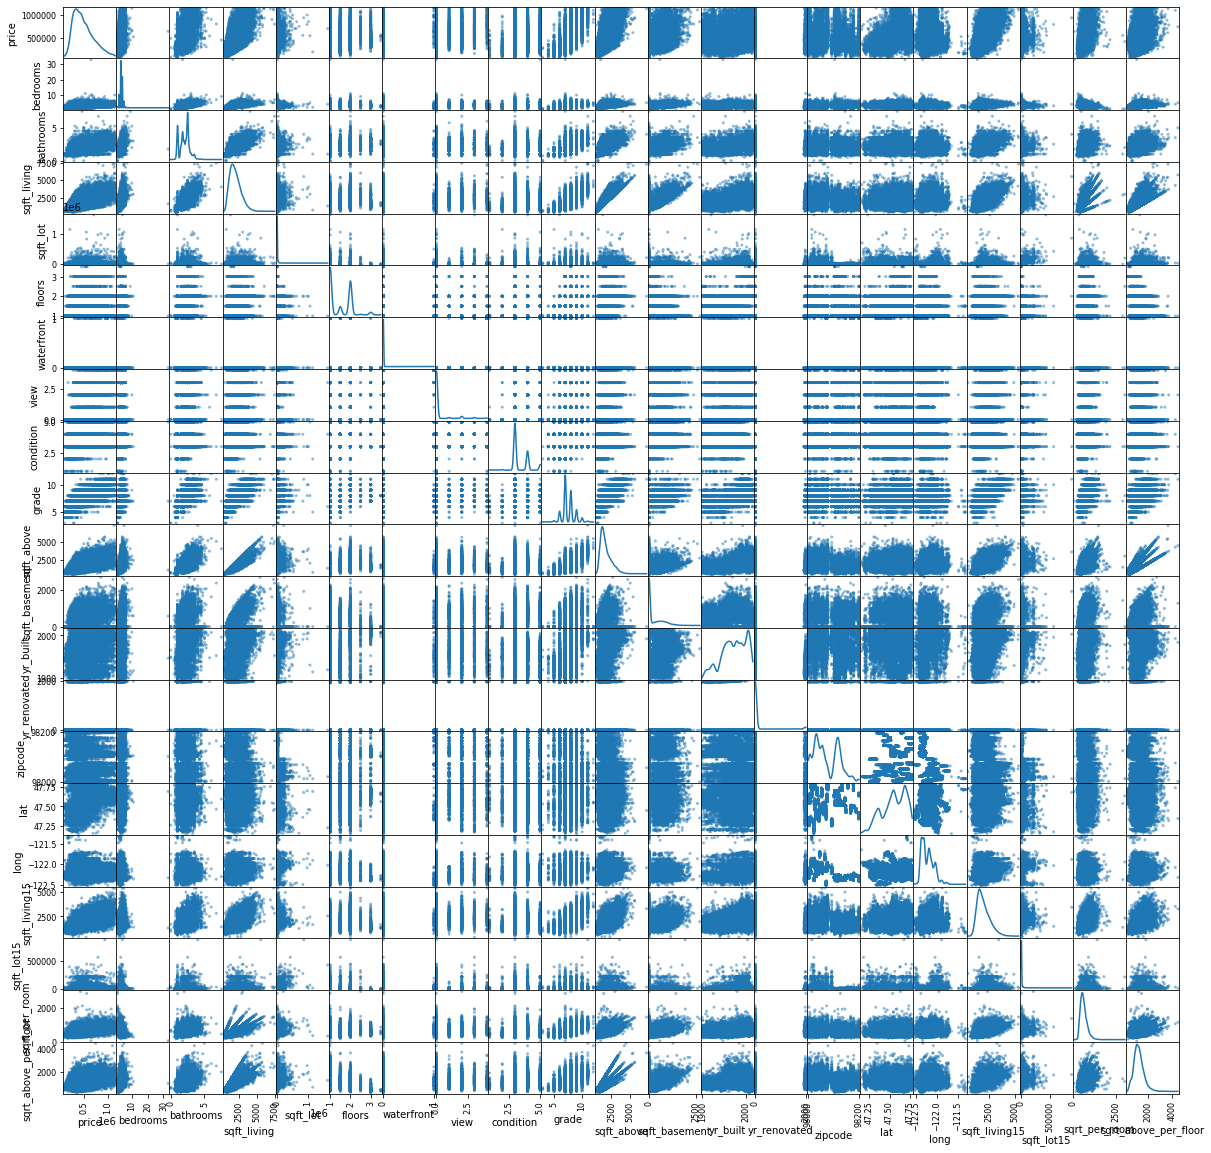

In [35]:
# 모든 컬럼들을 산점도로 통해 시각화하여 살펴보기
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df_selected, alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.show()

# target은 price이므로 산점도 매트릭스의 최상단 1행 혹은 우측 1열의 분포 양상 참고

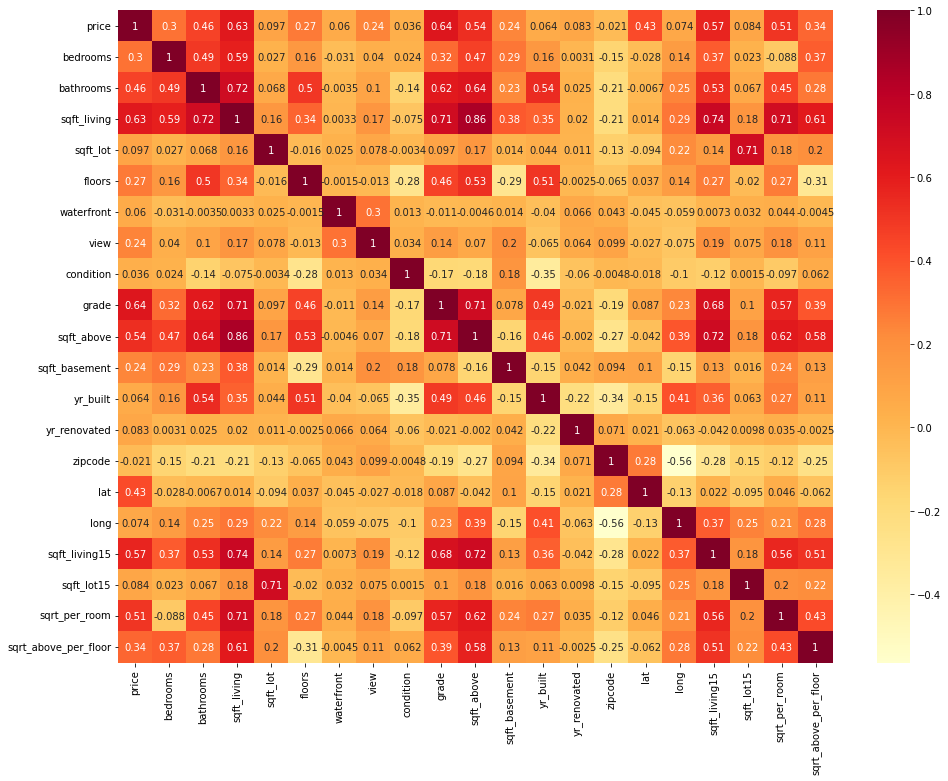

In [36]:
# 상관계수 파악 & 시각화로 살펴보기
# 상관계수 구하기
df_selected_corr = df_selected.corr()

# 상관계수 히트맵 확인
plt.figure(figsize=(16, 12))
sns.heatmap(df_selected_corr, annot=True, cmap="YlOrRd");

# target은 price이므로 히트맵 최상단 1행 혹은 우측 1열의 색상/수치 참고

In [37]:
# 산점도와 상관계수를 통해 features가 target과 어떤 관계를 가지고 있는지 파악
# 1) 산점도 : sqft_living, sqft_above, grade, bathroom 정도가 눈에 띔

# 2) 상관계수 : 순서대로 나열 후 상관계수 수치를 확인하여 feature 선택 여부 결정
df_target_corr = df_selected_corr[['price']].sort_values('price', ascending=False)
# BEST 5 : grade, sqft_living, sqft_living15, sqft_above, bathrooms
df_target_corr[1:6]

,price
grade,0.636186
sqft_living,0.627351
sqft_living15,0.568460
sqft_above,0.535294
sqrt_per_room,0.506164


In [38]:
# sqft_living, sqft_living15, sqft_above는 모두 '넓이'와 관련된 feature이므로, 상관관계가 가장 높은 feature 1개만 선택하여 사용.
features = ['grade', 'sqft_living', 'bathrooms']

# 상단에서 분리한 train/test 데이터를 가공 : 선택한 features만 추출 & feature/target분리
X_train = train[features]
y_train = train[["price"]]

X_test = test[features]
y_test = test[["price"]]

print("훈련 데이터의 features & target 확인", X_train.shape, y_train.shape)
print("테스트 데이터의 features & target 확인", X_test.shape, y_test.shape)

훈련 데이터의 features & target 확인 (14624, 3) (14624, 1)
테스트 데이터의 features & target 확인 (6976, 3) (6976, 1)


In [39]:
# 다중회귀모델 생성 & 학습
model_selected = LinearRegression().fit(X_train, y_train)

# 학습한 모델에 테스트 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred = model_selected.predict(X_test)

# 테스트 데이터의 예측값과 실제 테스트 데이터의 target값을 비교 -> 스코어계산
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred)

print("""
~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))


~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 168615.33227105692
2. 평균 제곱 오차 : 64413490117.33873
3. 평균 제곱근 오차 : 253798.12867186143
4. R-squared Score : 0.5108025873837041



In [40]:
# 회귀계수 확인
for i in range(len(features)):
  print("{0}번째 feature {1}의 회귀 계수 : {2} ".format(i+1, features[i], model_selected.coef_[0][i]))

print("\n회귀 모델의 절편 : {}".format(model_selected.intercept_))

1번째 feature grade의 회귀 계수 : 100833.12186531477 
2번째 feature sqft_living의 회귀 계수 : 208.65715512987728 
3번째 feature bathrooms의 회귀 계수 : -36675.2315571055 

회귀 모델의 절편 : [-595172.48960184]


In [41]:
# 훈련용/테스트용 데이터 셋 훈련 후 다양한 평가지표 수치를 계산, 비교 해보자.
# R2 스코어는 0과 1사이에서 어떤 수치를 나타내는지 비교해보자

# 1) 훈련용 데이터로 예측값 도출
# 다중회귀모델 생성 & 학습
model_selected = LinearRegression().fit(X_train, y_train)

# 학습한 모델에 훈련용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_train = model_selected.predict(X_train)


# 2) 테스트용 데이터로 예측값 도출
# 학습한 모델에 테스트용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_test = model_selected.predict(X_test)

In [42]:
# 훈련용 데이터의 예측값과 실제 훈련용 target 값 비교 -> 스코어계산

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

print("""
~ 훈련용 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_train, mse_train, rmse_train, r2_train))



# 테스트 데이터의 예측값과 실제 테스트 target값 비교 -> 스코어계산
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred)

print("""
~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))



~ 훈련용 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 160884.1822386311
2. 평균 제곱 오차 : 61480144069.59357
3. 평균 제곱근 오차 : 247951.89870132788
4. R-squared Score : 0.5487807212275697


~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 168615.33227105692
2. 평균 제곱 오차 : 64413490117.33873
3. 평균 제곱근 오차 : 253798.12867186143
4. R-squared Score : 0.5108025873837041



## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)